In [1]:
import numpy as np
import json
import re
import random
from openai import OpenAI
import csv
import os
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import requests
from langdetect import detect, LangDetectException
load_dotenv()
client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"), organization='org-LB0f6h3G5argFODGs1DOSLNn')

In [2]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.genmod.bayes_mixed_glm as smgb
import matplotlib.ticker as mtick
%matplotlib inline

In [3]:
import seaborn as sns

## Participant Data

In [4]:
pre_study = pd.read_csv("aggregation_data2/pre_study.csv")
pre_study.columns

Index(['user_id', 'user_condition', 'gender', 'age', 'ladder',
       'pre_survey_enthusiastic', 'pre_survey_happy', 'pre_survey_still',
       'pre_survey_lonely', 'pre_survey_sad', 'pre_survey_nervous',
       'pre_survey_satisfied', 'pre_survey_calm', 'pre_survey_relaxed',
       'pre_survey_tired', 'pre_survey_fearful', 'pre_survey_aroused',
       'pre_survey_excited', 'pre_survey_bored', 'pre_survey_angry'],
      dtype='object')

In [7]:
print(len(pre_study))

1662


In [6]:
pre_study["user_id"].describe()

count                   1662
unique                  1662
top       iP009a45e51df9d4f5
freq                       1
Name: user_id, dtype: object

<Axes: >

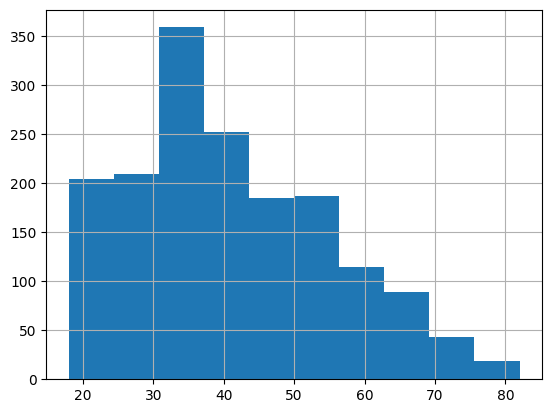

In [10]:
pre_study['age'].hist()

In [11]:
pre_study['ladder'].value_counts()

ladder
5.0     321
6.0     314
7.0     290
4.0     266
3.0     231
8.0     108
2.0      74
9.0      23
1.0      22
10.0     12
Name: count, dtype: int64

<Axes: >

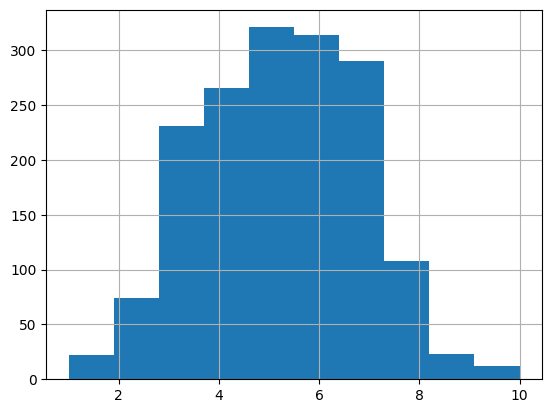

In [12]:
pre_study['ladder'].hist()

In [15]:
pre_study['gender'].value_counts()

gender
male      828
female    805
other      29
Name: count, dtype: int64

In [16]:
pre_study['binary_female'] = 0
pre_study.binary_female[pre_study.gender == 'female'] = 1

/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipykernel_10513/2978616618.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pre_study.binary_female[pre_study.gender == 'female'] = 1
/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipyker

In [17]:
pre_study['binary_female'].value_counts()

binary_female
0    857
1    805
Name: count, dtype: int64

<Axes: >

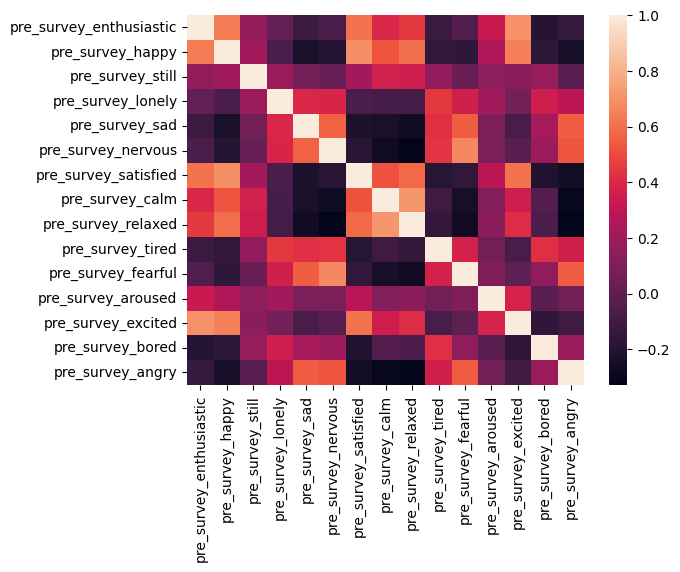

In [19]:
prestudy_corr = pre_study[[
'pre_survey_enthusiastic', 
'pre_survey_happy', 
'pre_survey_still', 
'pre_survey_lonely',
'pre_survey_sad',
'pre_survey_nervous',
'pre_survey_satisfied',
'pre_survey_calm',
'pre_survey_relaxed',
'pre_survey_tired',
'pre_survey_fearful',
'pre_survey_aroused',
'pre_survey_excited',
'pre_survey_bored',
'pre_survey_angry'
]].corr()
round(prestudy_corr,2)
sns.heatmap(prestudy_corr)

## 1HourAverage

### Merge the Pre-survey to 1HourAverage

In [20]:
pre_study = pd.read_csv("aggregation_data2/pre_study.csv")
pre_study.columns

Index(['user_id', 'user_condition', 'gender', 'age', 'ladder',
       'pre_survey_enthusiastic', 'pre_survey_happy', 'pre_survey_still',
       'pre_survey_lonely', 'pre_survey_sad', 'pre_survey_nervous',
       'pre_survey_satisfied', 'pre_survey_calm', 'pre_survey_relaxed',
       'pre_survey_tired', 'pre_survey_fearful', 'pre_survey_aroused',
       'pre_survey_excited', 'pre_survey_bored', 'pre_survey_angry'],
      dtype='object')

In [21]:
pre_study.head()

,user_id,user_condition,gender,age,ladder,pre_survey_enthusiastic,pre_survey_happy,pre_survey_still,pre_survey_lonely,pre_survey_sad,pre_survey_nervous,pre_survey_satisfied,pre_survey_calm,pre_survey_relaxed,pre_survey_tired,pre_survey_fearful,pre_survey_aroused,pre_survey_excited,pre_survey_bored,pre_survey_angry
0,iP009a45e51df9d4f5,R_T,male,41,9.0,1,4,1,2,1,2,4,2,4,3,3,1,4,1,2
1,iP00d70f7a8a9e689f,R_C,male,24,4.0,2,5,3,3,4,3,2,4,4,1,5,3,4,4,5
2,iP0101580a98ac0395,I_C,male,34,4.0,1,2,4,3,2,1,4,2,4,2,3,4,2,1,1
3,iP011d4828b4e4458b,R_T,female,34,2.0,2,2,2,1,3,3,3,2,3,3,1,1,1,2,3
4,iP0122f70ccf3ebf7d,I_C,female,51,4.0,4,4,2,1,2,1,3,4,4,2,1,2,3,2,2


In [22]:
print(len(pre_study))

1662


In [23]:
pre_study["user_id"].describe()

count                   1662
unique                  1662
top       iP009a45e51df9d4f5
freq                       1
Name: user_id, dtype: object

In [24]:
hourAverage = pd.read_csv("aggregation_data2/1hourAverage.csv")
hourAverage.columns

Index(['question_id', 'user_id', 'time', 'tweet_id', 'tab_id',
       'user_condition', 'angry', 'calm', 'excited', 'sad',
       'predicted_nervous_1hourAverage', 'predicted_sad_1hourAverage',
       'predicted_happy_1hourAverage', 'predicted_calm_1hourAverage',
       'predicted_excited_1hourAverage', 'predicted_aroused_1hourAverage',
       'predicted_angry_1hourAverage', 'predicted_relaxed_1hourAverage',
       'predicted_fearful_1hourAverage', 'predicted_enthusiastic_1hourAverage',
       'predicted_still_1hourAverage', 'predicted_satisfied_1hourAverage',
       'predicted_bored_1hourAverage', 'predicted_lonely_1hourAverage'],
      dtype='object')

In [25]:
hourAverage.head()

,question_id,user_id,time,tweet_id,tab_id,user_condition,angry,calm,excited,sad,...,predicted_excited_1hourAverage,predicted_aroused_1hourAverage,predicted_angry_1hourAverage,predicted_relaxed_1hourAverage,predicted_fearful_1hourAverage,predicted_enthusiastic_1hourAverage,predicted_still_1hourAverage,predicted_satisfied_1hourAverage,predicted_bored_1hourAverage,predicted_lonely_1hourAverage
0,5f3b6ebd9a7040a38513726b70657033,009FBF921182482EB3B2C7C66D5DF395,2024-07-08 21:08:13.164,1810281303217967397,c5bb5f23-7e2b-4582-aee1-19e5a4a0b0ca,R_T,NaN,NaN,0.0,0.0,...,2.000000,1.500000,3.250000,1.000000,1.500000,1.750000,1.000000,1.250000,1.000000,1.000000
1,c438a99d6afd419dbdf3e0721fb99eb3,009FBF921182482EB3B2C7C66D5DF395,2024-07-08 21:10:40.822,1810419787660513353,c5bb5f23-7e2b-4582-aee1-19e5a4a0b0ca,R_T,NaN,NaN,0.0,0.0,...,2.400000,2.100000,3.300000,1.200000,2.200000,2.300000,1.100000,1.300000,1.000000,1.000000
2,afe3b1e4a9bf4050b14ced074dbe9b75,009FBF921182482EB3B2C7C66D5DF395,2024-07-08 21:20:07.275,1810039913515008329,c5bb5f23-7e2b-4582-aee1-19e5a4a0b0ca,R_T,4.0,98.0,NaN,NaN,...,2.633333,2.200000,3.066667,1.133333,1.966667,2.500000,1.033333,1.333333,1.066667,1.000000
3,bdecbe16b4464dc9930fa6dfb41c6927,009FBF921182482EB3B2C7C66D5DF395,2024-07-08 21:30:53.346,1810296420056121348,c5bb5f23-7e2b-4582-aee1-19e5a4a0b0ca,R_T,NaN,95.0,NaN,0.0,...,2.651163,2.302326,2.953488,1.116279,2.069767,2.465116,1.023256,1.372093,1.046512,1.046512
4,deb7b6a4018a4c43a182bc641ec00e83,009FBF921182482EB3B2C7C66D5DF395,2024-07-08 23:01:13.242,1810482606376386645,d3a97236-40c4-4184-81b0-539c4b0adfab,R_T,NaN,97.0,NaN,0.0,...,2.944444,2.361111,2.416667,1.277778,1.638889,2.777778,1.083333,1.583333,1.055556,1.000000


In [26]:
print(len(hourAverage))

16315


In [27]:
print(len(hourAverage['user_id'].unique()))

1233


In [28]:
merged_hourAverage = pd.merge(hourAverage, pre_study, on=['user_id'])
print(len(merged_hourAverage))

16291


In [29]:
merged_hourAverage.columns

Index(['question_id', 'user_id', 'time', 'tweet_id', 'tab_id',
       'user_condition_x', 'angry', 'calm', 'excited', 'sad',
       'predicted_nervous_1hourAverage', 'predicted_sad_1hourAverage',
       'predicted_happy_1hourAverage', 'predicted_calm_1hourAverage',
       'predicted_excited_1hourAverage', 'predicted_aroused_1hourAverage',
       'predicted_angry_1hourAverage', 'predicted_relaxed_1hourAverage',
       'predicted_fearful_1hourAverage', 'predicted_enthusiastic_1hourAverage',
       'predicted_still_1hourAverage', 'predicted_satisfied_1hourAverage',
       'predicted_bored_1hourAverage', 'predicted_lonely_1hourAverage',
       'user_condition_y', 'gender', 'age', 'ladder',
       'pre_survey_enthusiastic', 'pre_survey_happy', 'pre_survey_still',
       'pre_survey_lonely', 'pre_survey_sad', 'pre_survey_nervous',
       'pre_survey_satisfied', 'pre_survey_calm', 'pre_survey_relaxed',
       'pre_survey_tired', 'pre_survey_fearful', 'pre_survey_aroused',
       'pre_survey_e

In [30]:
merged_hourAverage.describe()

,tweet_id,angry,calm,excited,sad,predicted_nervous_1hourAverage,predicted_sad_1hourAverage,predicted_happy_1hourAverage,predicted_calm_1hourAverage,predicted_excited_1hourAverage,...,pre_survey_nervous,pre_survey_satisfied,pre_survey_calm,pre_survey_relaxed,pre_survey_tired,pre_survey_fearful,pre_survey_aroused,pre_survey_excited,pre_survey_bored,pre_survey_angry
count,1.629100e+04,8108.000000,8184.000000,8014.000000,8052.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,...,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,1.817065e+18,18.872348,59.457111,31.368605,19.701441,1.500750,1.440420,2.761937,1.203464,3.123955,...,2.006323,2.705482,3.081149,2.987048,2.184396,1.978700,1.805168,2.450862,2.093549,2.334111
std,5.155292e+15,23.790249,27.860257,29.030284,24.094925,0.343897,0.338745,0.688237,0.201374,0.481482,...,1.046153,1.076933,1.085162,1.124433,1.059381,1.046424,0.989062,1.052735,0.989864,1.000566
min,1.500041e+18,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.814454e+18,2.000000,42.000000,5.000000,2.000000,1.285714,1.235294,2.321092,1.076923,2.846154,...,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000
50%,1.816637e+18,8.000000,60.000000,25.000000,9.000000,1.447368,1.400000,2.772727,1.166667,3.125000,...,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
75%,1.819748e+18,25.000000,79.000000,50.000000,26.000000,1.658537,1.577778,3.209197,1.269231,3.400000,...,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
max,1.826981e+18,100.000000,100.000000,100.000000,100.000000,5.000000,5.000000,5.000000,4.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Correlation of predicted emotion, pre_survey emotion, and inline_survey emotion

In [31]:
merged_hourAverage[['predicted_sad_1hourAverage','pre_survey_sad', 'sad']].corr()

,predicted_sad_1hourAverage,pre_survey_sad,sad
predicted_sad_1hourAverage,1.000000,-0.002285,0.081165
pre_survey_sad,-0.002285,1.000000,0.310739
sad,0.081165,0.310739,1.000000


In [32]:
merged_hourAverage[['predicted_angry_1hourAverage','pre_survey_angry', 'angry']].corr()

,predicted_angry_1hourAverage,pre_survey_angry,angry
predicted_angry_1hourAverage,1.000000,0.070085,0.177074
pre_survey_angry,0.070085,1.000000,0.314129
angry,0.177074,0.314129,1.000000


In [33]:
merged_hourAverage[['predicted_calm_1hourAverage','pre_survey_calm', 'calm']].corr()

,predicted_calm_1hourAverage,pre_survey_calm,calm
predicted_calm_1hourAverage,1.000000,-0.013161,0.005140
pre_survey_calm,-0.013161,1.000000,0.375801
calm,0.005140,0.375801,1.000000


In [34]:
merged_hourAverage[['predicted_excited_1hourAverage','pre_survey_excited', 'excited']].corr()

,predicted_excited_1hourAverage,pre_survey_excited,excited
predicted_excited_1hourAverage,1.000000,0.093834,0.123027
pre_survey_excited,0.093834,1.000000,0.401166
excited,0.123027,0.401166,1.000000


### Regression

<Axes: >

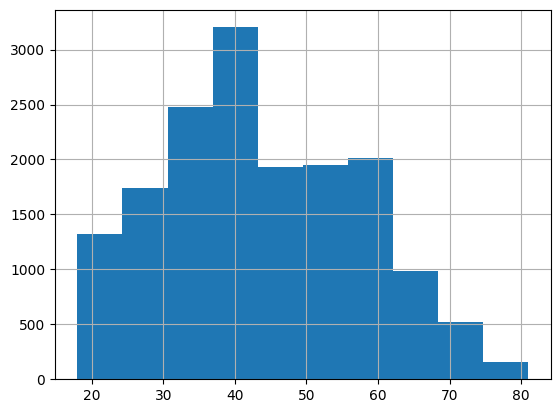

In [35]:
merged_hourAverage['age'].hist()

In [36]:
merged_hourAverage['ladder'].value_counts()

ladder
5.0     3487
6.0     2831
4.0     2602
3.0     2585
7.0     2414
2.0      998
8.0      880
9.0      226
1.0      215
10.0      53
Name: count, dtype: int64

<Axes: >

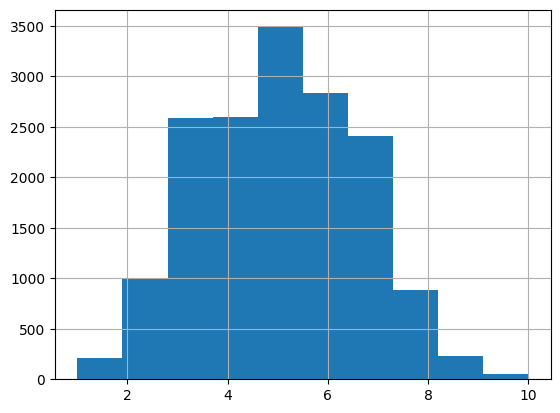

In [37]:
merged_hourAverage['ladder'].hist()

In [38]:
merged_hourAverage['gender'].value_counts()

gender
male      9062
female    6901
other      328
Name: count, dtype: int64

In [39]:
merged_hourAverage['binary_female'] = 0
merged_hourAverage.binary_female[merged_hourAverage.gender == 'female'] = 1

/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipykernel_10513/4267222069.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  merged_hourAverage.binary_female[merged_hourAverage.gender == 'female'] = 1
/var/folders/76/5w1g8h3d1y53y5vcpx55t

In [40]:
merged_hourAverage['binary_female'].value_counts()

binary_female
0    9390
1    6901
Name: count, dtype: int64

check the correlation between some factors - so they are not colinear when we do regression.

In [41]:
merged_hourAverage[['predicted_angry_1hourAverage','pre_survey_angry', 'angry', 'age', 'binary_female']].corr()

,predicted_angry_1hourAverage,pre_survey_angry,angry,age,binary_female
predicted_angry_1hourAverage,1.000000,0.070085,0.177074,0.155006,-0.062726
pre_survey_angry,0.070085,1.000000,0.314129,-0.048423,-0.031996
angry,0.177074,0.314129,1.000000,0.031987,-0.059566
age,0.155006,-0.048423,0.031987,1.000000,0.090854
binary_female,-0.062726,-0.031996,-0.059566,0.090854,1.000000


array([[<Axes: title={'center': 'predicted_angry_1hourAverage'}>,
        <Axes: title={'center': 'pre_survey_angry'}>],
       [<Axes: title={'center': 'angry'}>, <Axes: >]], dtype=object)

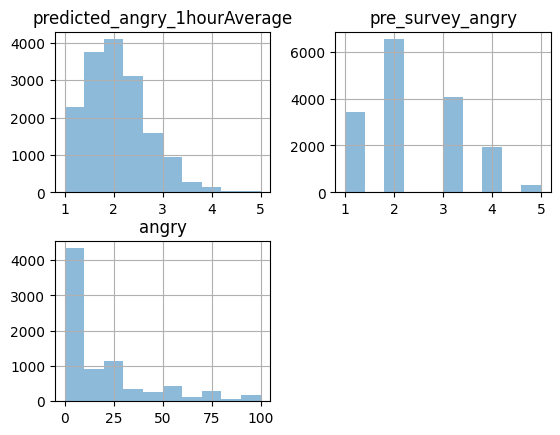

In [42]:
merged_hourAverage[['predicted_angry_1hourAverage','pre_survey_angry', 'angry']].hist(alpha=0.5)

array([[<Axes: title={'center': 'predicted_excited_1hourAverage'}>,
        <Axes: title={'center': 'pre_survey_excited'}>],
       [<Axes: title={'center': 'excited'}>, <Axes: >]], dtype=object)

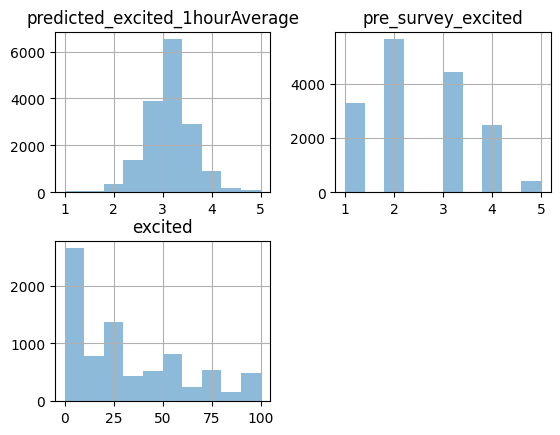

In [43]:
merged_hourAverage[['predicted_excited_1hourAverage', 'pre_survey_excited', 'excited']].hist(alpha=0.5)

In [44]:
angry_corr = merged_hourAverage[['pre_survey_angry',
'pre_survey_enthusiastic', 
'pre_survey_happy', 
'pre_survey_still', 
'pre_survey_lonely',
'pre_survey_sad',
'pre_survey_nervous',
'pre_survey_satisfied',
'pre_survey_calm',
'pre_survey_relaxed',
'pre_survey_tired',
'pre_survey_fearful',
'pre_survey_aroused',
'pre_survey_excited',
'pre_survey_bored',
]].corr()
round(angry_corr,2)

,pre_survey_angry,pre_survey_enthusiastic,pre_survey_happy,pre_survey_still,pre_survey_lonely,pre_survey_sad,pre_survey_nervous,pre_survey_satisfied,pre_survey_calm,pre_survey_relaxed,pre_survey_tired,pre_survey_fearful,pre_survey_aroused,pre_survey_excited,pre_survey_bored
pre_survey_angry,1.00,-0.13,-0.32,-0.07,0.26,0.56,0.51,-0.27,-0.37,-0.38,0.39,0.57,0.08,-0.08,0.16
pre_survey_enthusiastic,-0.13,1.00,0.61,0.10,-0.02,-0.11,-0.03,0.57,0.35,0.39,-0.09,-0.01,0.28,0.70,-0.21
pre_survey_happy,-0.32,0.61,1.00,0.18,-0.13,-0.27,-0.19,0.68,0.52,0.55,-0.20,-0.21,0.17,0.58,-0.16
pre_survey_still,-0.07,0.10,0.18,1.00,0.15,-0.05,-0.08,0.19,0.40,0.36,0.08,-0.10,0.10,0.10,0.13
pre_survey_lonely,0.26,-0.02,-0.13,0.15,1.00,0.35,0.35,-0.08,-0.09,-0.08,0.43,0.30,0.22,0.08,0.33
pre_survey_sad,0.56,-0.11,-0.27,-0.05,0.35,1.00,0.57,-0.24,-0.28,-0.32,0.43,0.56,0.08,-0.05,0.19
pre_survey_nervous,0.51,-0.03,-0.19,-0.08,0.35,0.57,1.00,-0.17,-0.32,-0.38,0.48,0.71,0.12,0.04,0.13
pre_survey_satisfied,-0.27,0.57,0.68,0.19,-0.08,-0.24,-0.17,1.00,0.46,0.51,-0.22,-0.17,0.19,0.55,-0.21
pre_survey_calm,-0.37,0.35,0.52,0.40,-0.09,-0.28,-0.32,0.46,1.00,0.71,-0.16,-0.30,0.03,0.27,-0.02
pre_survey_relaxed,-0.38,0.39,0.55,0.36,-0.08,-0.32,-0.38,0.51,0.71,1.00,-0.18,-0.34,0.08,0.31,-0.06


calculate the collapsed pre-study categories

In [55]:
pre_study.head()

,user_id,user_condition,gender,age,ladder,pre_survey_enthusiastic,pre_survey_happy,pre_survey_still,pre_survey_lonely,pre_survey_sad,pre_survey_nervous,pre_survey_satisfied,pre_survey_calm,pre_survey_relaxed,pre_survey_tired,pre_survey_fearful,pre_survey_aroused,pre_survey_excited,pre_survey_bored,pre_survey_angry
0,iP009a45e51df9d4f5,R_T,male,41,9.0,1,4,1,2,1,2,4,2,4,3,3,1,4,1,2
1,iP00d70f7a8a9e689f,R_C,male,24,4.0,2,5,3,3,4,3,2,4,4,1,5,3,4,4,5
2,iP0101580a98ac0395,I_C,male,34,4.0,1,2,4,3,2,1,4,2,4,2,3,4,2,1,1
3,iP011d4828b4e4458b,R_T,female,34,2.0,2,2,2,1,3,3,3,2,3,3,1,1,1,2,3
4,iP0122f70ccf3ebf7d,I_C,female,51,4.0,4,4,2,1,2,1,3,4,4,2,1,2,3,2,2


In [56]:
df = pre_study

In [57]:
emotion_mapping = {
    "pre_survey_HAP": ["pre_survey_excited", "pre_survey_enthusiastic", "pre_survey_happy"],
    "pre_survey_HAN": ["pre_survey_angry", "pre_survey_fearful", "pre_survey_nervous"],
    "pre_survey_LAP": ["pre_survey_calm", "pre_survey_relaxed", "pre_survey_satisfied"],
    "pre_survey_LAN": ["pre_survey_sad", "pre_survey_bored", "pre_survey_lonely", "pre_survey_tired"]
}


In [58]:
for category, emotions in emotion_mapping.items():
    df[category] = df[emotions].mean(axis=1)

df.head()

,user_id,user_condition,gender,age,ladder,pre_survey_enthusiastic,pre_survey_happy,pre_survey_still,pre_survey_lonely,pre_survey_sad,...,pre_survey_tired,pre_survey_fearful,pre_survey_aroused,pre_survey_excited,pre_survey_bored,pre_survey_angry,pre_survey_HAP,pre_survey_HAN,pre_survey_LAP,pre_survey_LAN
0,iP009a45e51df9d4f5,R_T,male,41,9.0,1,4,1,2,1,...,3,3,1,4,1,2,3.000000,2.333333,3.333333,1.75
1,iP00d70f7a8a9e689f,R_C,male,24,4.0,2,5,3,3,4,...,1,5,3,4,4,5,3.666667,4.333333,3.333333,3.00
2,iP0101580a98ac0395,I_C,male,34,4.0,1,2,4,3,2,...,2,3,4,2,1,1,1.666667,1.666667,3.333333,2.00
3,iP011d4828b4e4458b,R_T,female,34,2.0,2,2,2,1,3,...,3,1,1,1,2,3,1.666667,2.333333,2.666667,2.25
4,iP0122f70ccf3ebf7d,I_C,female,51,4.0,4,4,2,1,2,...,2,1,2,3,2,2,3.666667,1.333333,3.666667,1.75


In [59]:
df_corr = df[["pre_survey_HAP", "pre_survey_HAN", "pre_survey_LAP", "pre_survey_LAN"]].corr()
round(df_corr,2)

,pre_survey_HAP,pre_survey_HAN,pre_survey_LAP,pre_survey_LAN
pre_survey_HAP,1.00,-0.14,0.68,-0.17
pre_survey_HAN,-0.14,1.00,-0.36,0.58
pre_survey_LAP,0.68,-0.36,1.00,-0.23
pre_survey_LAN,-0.17,0.58,-0.23,1.00


<Axes: >

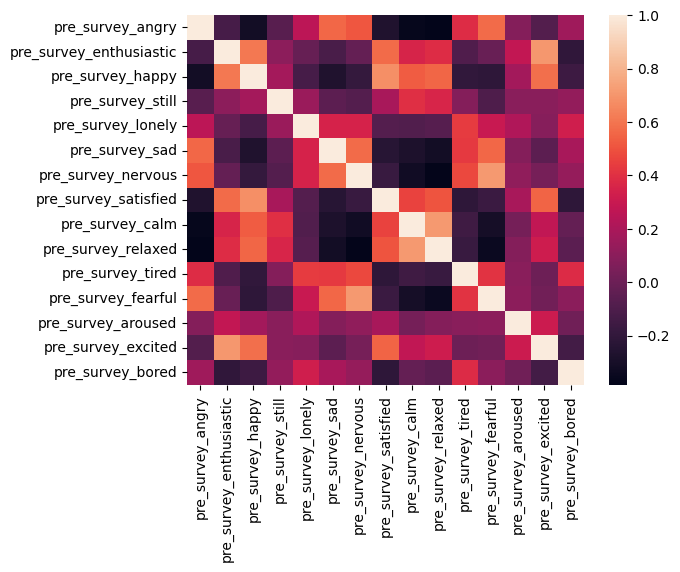

In [45]:
sns.heatmap(angry_corr)

Make z score

In [46]:
merged_hourAverage['var_age'] = (merged_hourAverage['age'] - merged_hourAverage['age'].mean()) / merged_hourAverage['age'].std()
merged_hourAverage['var_age'].describe()

count    16291.000000
mean         0.000000
std          1.000000
min         -1.856779
25%         -0.771491
50%         -0.120318
75%          0.820265
max          2.701431
Name: var_age, dtype: float64

In [47]:
# shift ladder to have a mean 0
merged_hourAverage['var_ladder'] = (merged_hourAverage['ladder'] - merged_hourAverage['ladder'].mean())
merged_hourAverage['var_ladder'].describe()

count    1.629100e+04
mean    -3.279898e-16
std      1.764364e+00
min     -3.990301e+00
25%     -9.903014e-01
50%      9.698607e-03
75%      1.009699e+00
max      5.009699e+00
Name: var_ladder, dtype: float64

In [48]:
merged_hourAverage['var_pre_survey_angry'] = (merged_hourAverage['pre_survey_angry'] - merged_hourAverage['pre_survey_angry'].mean()) / merged_hourAverage['pre_survey_angry'].std()
merged_hourAverage['var_pre_survey_sad'] = (merged_hourAverage['pre_survey_sad'] - merged_hourAverage['pre_survey_sad'].mean()) / merged_hourAverage['pre_survey_sad'].std()
merged_hourAverage['var_pre_survey_excited'] = (merged_hourAverage['pre_survey_excited'] - merged_hourAverage['pre_survey_excited'].mean()) / merged_hourAverage['pre_survey_excited'].std()
merged_hourAverage['var_pre_survey_calm'] = (merged_hourAverage['pre_survey_calm'] - merged_hourAverage['pre_survey_calm'].mean()) / merged_hourAverage['pre_survey_calm'].std()


Actual Regression

In [49]:
merged_hourAverage[['predicted_excited_1hourAverage','pre_survey_excited', 'pre_survey_angry', 'excited']].corr()

,predicted_excited_1hourAverage,pre_survey_excited,pre_survey_angry,excited
predicted_excited_1hourAverage,1.000000,0.093834,-0.069223,0.123027
pre_survey_excited,0.093834,1.000000,-0.081477,0.401166
pre_survey_angry,-0.069223,-0.081477,1.000000,-0.131119
excited,0.123027,0.401166,-0.131119,1.000000


In [ ]:
merged_hourAverage[['predicted_excited_1hourAverage','pre_survey_excited', 'pre_survey_angry', 'excited']].corr()

In [53]:
md = smf.mixedlm("angry ~ var_age + binary_female + var_ladder + var_pre_survey_angry + predicted_nervous_1hourAverage", merged_hourAverage, groups=merged_hourAverage["user_id"], missing='drop')
mdf = md.fit()
print(mdf.summary())

                  Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      angry      
No. Observations:        8108         Method:                  REML       
No. Groups:              1152         Scale:                   273.6092   
Min. group size:         1            Log-Likelihood:          -35204.7871
Max. group size:         42           Converged:               Yes        
Mean group size:         7.0                                              
--------------------------------------------------------------------------
                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------
Intercept                       14.185    1.214 11.681 0.000 11.805 16.565
var_age                          0.963    0.503  1.915 0.055 -0.022  1.948
binary_female                   -2.786    1.021 -2.728 0.006 -4.788 -0.784
var_ladder                      -0.433    0.

In [44]:
md = smf.mixedlm("excited ~ var_age + binary_female + var_ladder + var_pre_survey_excited + predicted_excited_1hourAverage", merged_hourAverage, groups=merged_hourAverage["user_id"], missing='drop')
mdf = md.fit()
print(mdf.summary())

                  Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      excited    
No. Observations:        8014         Method:                  REML       
No. Groups:              1148         Scale:                   297.3276   
Min. group size:         1            Log-Likelihood:          -35329.6887
Max. group size:         44           Converged:               Yes        
Mean group size:         7.0                                              
--------------------------------------------------------------------------
                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------
Intercept                       18.952    1.850 10.243 0.000 15.325 22.578
var_age                          1.317    0.632  2.085 0.037  0.079  2.556
binary_female                   -1.865    1.279 -1.458 0.145 -4.371  0.642
var_ladder                       3.178    0.

In [38]:
merged_hourAverage[['var_pre_survey_sad', 'var_pre_survey_angry', 'var_pre_survey_excited', 'var_pre_survey_calm']].corr()

,var_pre_survey_sad,var_pre_survey_angry,var_pre_survey_excited,var_pre_survey_calm
var_pre_survey_sad,1.000000,0.558700,-0.051415,-0.279469
var_pre_survey_angry,0.558700,1.000000,-0.081477,-0.367196
var_pre_survey_excited,-0.051415,-0.081477,1.000000,0.270612
var_pre_survey_calm,-0.279469,-0.367196,0.270612,1.000000


In [45]:
md = smf.mixedlm("sad ~ var_age + binary_female + var_ladder + var_pre_survey_sad + predicted_sad_1hourAverage", merged_hourAverage, groups=merged_hourAverage["user_id"], missing='drop')
mdf = md.fit()
print(mdf.summary())

                Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     sad        
No. Observations:      8052        Method:                 REML       
No. Groups:            1154        Scale:                  262.6166   
Min. group size:       1           Log-Likelihood:         -34902.1108
Max. group size:       45          Converged:              Yes        
Mean group size:       7.0                                            
----------------------------------------------------------------------
                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                   15.459    1.135 13.614 0.000 13.233 17.684
var_age                     -1.025    0.533 -1.924 0.054 -2.068  0.019
binary_female               -0.702    1.093 -0.642 0.521 -2.844  1.441
var_ladder                  -1.445    0.315 -4.591 0.000 -2.062 -0.828
var_pre_survey_sad     

In [47]:
md = smf.mixedlm("calm ~ var_age + binary_female + var_ladder + var_pre_survey_calm + predicted_calm_1hourAverage", merged_hourAverage, groups=merged_hourAverage["user_id"], missing='drop')
mdf = md.fit()
print(mdf.summary())
print(mdf.rsquared_adj)

                 Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     calm       
No. Observations:       8184        Method:                 REML       
No. Groups:             1155        Scale:                  298.9368   
Min. group size:        1           Log-Likelihood:         -36038.3516
Max. group size:        45          Converged:              Yes        
Mean group size:        7.1                                            
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                    58.299    1.606 36.304 0.000 55.152 61.447
var_age                       2.401    0.591  4.061 0.000  1.242  3.559
binary_female                -0.984    1.211 -0.812 0.417 -3.358  1.391
var_ladder                    2.006    0.346  5.799 0.000  1.328  2.684
var_pre_s

AttributeError: 'MixedLMResults' object has no attribute 'rsquared_adj'

In [108]:
emotions = ['angry', 'excited', 'sad', 'calm']
for emotion in emotions:
    print("-" * 30)
    print("Regression Result for " + emotion)
    md = smf.mixedlm(f"{emotion} ~ var_age + binary_female + var_ladder + var_pre_survey_{emotion} + var_pre_survey_excited + predicted_{emotion}_1hourAverage", merged_hourAverage, groups=merged_hourAverage["user_id"], missing='drop')
    mdf = md.fit()
    print(mdf.summary())

------------------------------
Regression Result for angry
                 Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      angry      
No. Observations:      8108         Method:                  REML       
No. Groups:            1152         Scale:                   271.8580   
Min. group size:       1            Log-Likelihood:          -35173.7472
Max. group size:       42           Converged:               Yes        
Mean group size:       7.0                                              
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                     12.440    1.042 11.934 0.000 10.397 14.484
var_age                        0.755    0.506  1.493 0.135 -0.236  1.746
binary_female                 -2.569    1.017 -2.527 0.012 -4.562 -0.576
var_ladder

## 1HourMax

### Merge the Pre-survey to 1HourMax

In [50]:
pre_study = pd.read_csv("aggregation_data2/pre_study.csv")
pre_study.columns

Index(['user_id', 'user_condition', 'gender', 'age', 'ladder',
       'pre_survey_enthusiastic', 'pre_survey_happy', 'pre_survey_still',
       'pre_survey_lonely', 'pre_survey_sad', 'pre_survey_nervous',
       'pre_survey_satisfied', 'pre_survey_calm', 'pre_survey_relaxed',
       'pre_survey_tired', 'pre_survey_fearful', 'pre_survey_aroused',
       'pre_survey_excited', 'pre_survey_bored', 'pre_survey_angry'],
      dtype='object')

In [51]:
print(len(pre_study))

1662


In [52]:
pre_study["user_id"].describe()

count                   1662
unique                  1662
top       iP009a45e51df9d4f5
freq                       1
Name: user_id, dtype: object

In [53]:
hourMax = pd.read_csv("aggregation_data2/1hourMax.csv")
hourMax.columns

Index(['question_id', 'user_id', 'time', 'tweet_id', 'tab_id',
       'user_condition', 'angry', 'calm', 'excited', 'sad',
       'predicted_nervous_1hourMax', 'predicted_sad_1hourMax',
       'predicted_happy_1hourMax', 'predicted_calm_1hourMax',
       'predicted_excited_1hourMax', 'predicted_aroused_1hourMax',
       'predicted_angry_1hourMax', 'predicted_relaxed_1hourMax',
       'predicted_fearful_1hourMax', 'predicted_enthusiastic_1hourMax',
       'predicted_still_1hourMax', 'predicted_satisfied_1hourMax',
       'predicted_bored_1hourMax', 'predicted_lonely_1hourMax'],
      dtype='object')

In [54]:
print(len(hourMax))

16315


In [90]:
merged_hourMax = pd.merge(hourMax, pre_study, on=['user_id'])
print(len(merged_hourMax))

16291


In [56]:
merged_hourMax.columns

Index(['question_id', 'user_id', 'time', 'tweet_id', 'tab_id',
       'user_condition_x', 'angry', 'calm', 'excited', 'sad',
       'predicted_nervous_1hourMax', 'predicted_sad_1hourMax',
       'predicted_happy_1hourMax', 'predicted_calm_1hourMax',
       'predicted_excited_1hourMax', 'predicted_aroused_1hourMax',
       'predicted_angry_1hourMax', 'predicted_relaxed_1hourMax',
       'predicted_fearful_1hourMax', 'predicted_enthusiastic_1hourMax',
       'predicted_still_1hourMax', 'predicted_satisfied_1hourMax',
       'predicted_bored_1hourMax', 'predicted_lonely_1hourMax',
       'user_condition_y', 'gender', 'age', 'ladder',
       'pre_survey_enthusiastic', 'pre_survey_happy', 'pre_survey_still',
       'pre_survey_lonely', 'pre_survey_sad', 'pre_survey_nervous',
       'pre_survey_satisfied', 'pre_survey_calm', 'pre_survey_relaxed',
       'pre_survey_tired', 'pre_survey_fearful', 'pre_survey_aroused',
       'pre_survey_excited', 'pre_survey_bored', 'pre_survey_angry'],
      

#### Correlation of predicted emotion, pre_survey emotion, and inline_survey emotion

In [109]:
merged_hourMax[['predicted_sad_1hourMax','pre_survey_sad', 'sad']].corr()

,predicted_sad_1hourMax,pre_survey_sad,sad
predicted_sad_1hourMax,1.000000,0.006830,0.058122
pre_survey_sad,0.006830,1.000000,0.310739
sad,0.058122,0.310739,1.000000


In [110]:
merged_hourMax[['predicted_angry_1hourMax','pre_survey_angry', 'angry']].corr()

,predicted_angry_1hourMax,pre_survey_angry,angry
predicted_angry_1hourMax,1.000000,0.030799,0.107242
pre_survey_angry,0.030799,1.000000,0.314129
angry,0.107242,0.314129,1.000000


In [111]:
merged_hourMax[['predicted_calm_1hourMax','pre_survey_calm', 'calm']].corr()

,predicted_calm_1hourMax,pre_survey_calm,calm
predicted_calm_1hourMax,1.000000,-0.004479,-0.008983
pre_survey_calm,-0.004479,1.000000,0.375801
calm,-0.008983,0.375801,1.000000


In [112]:
merged_hourMax[['predicted_excited_1hourMax','pre_survey_excited', 'excited']].corr()

,predicted_excited_1hourMax,pre_survey_excited,excited
predicted_excited_1hourMax,1.000000,0.045345,0.030038
pre_survey_excited,0.045345,1.000000,0.401166
excited,0.030038,0.401166,1.000000


### Regression

<Axes: >

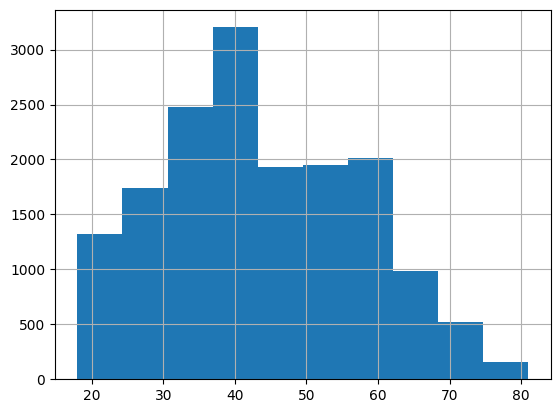

In [113]:
merged_hourMax['age'].hist()

In [117]:
merged_hourMax['gender'].value_counts()

gender
male      9062
female    6901
other      328
Name: count, dtype: int64

In [118]:
merged_hourMax['binary_female'] = 0
merged_hourMax.binary_female[merged_hourMax.gender == 'female'] = 1

/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipykernel_1956/1268897729.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  merged_hourMax.binary_female[merged_hourMax.gender == 'female'] = 1
/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn

In [119]:
merged_hourMax['binary_female'].value_counts()

binary_female
0    9390
1    6901
Name: count, dtype: int64

check the correlation between some factors - so they are not colinear when we do regression.

In [121]:
merged_hourMax[['predicted_angry_1hourMax','pre_survey_angry', 'angry', 'age', 'binary_female']].corr()

,predicted_angry_1hourMax,pre_survey_angry,angry,age,binary_female
predicted_angry_1hourMax,1.000000,0.030799,0.107242,0.075630,-0.037931
pre_survey_angry,0.030799,1.000000,0.314129,-0.048423,-0.031996
angry,0.107242,0.314129,1.000000,0.031987,-0.059566
age,0.075630,-0.048423,0.031987,1.000000,0.090854
binary_female,-0.037931,-0.031996,-0.059566,0.090854,1.000000


array([[<Axes: title={'center': 'predicted_angry_1hourMax'}>,
        <Axes: title={'center': 'pre_survey_angry'}>],
       [<Axes: title={'center': 'angry'}>, <Axes: >]], dtype=object)

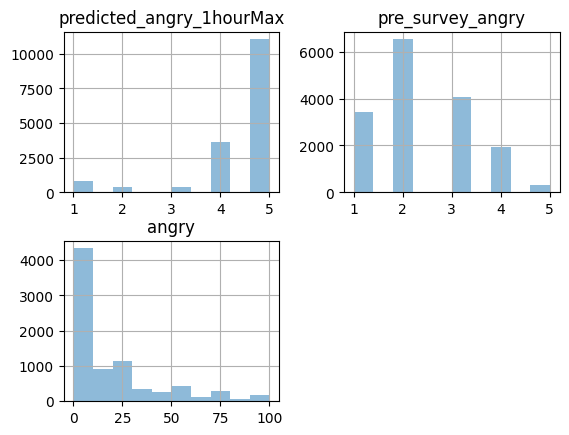

In [122]:
merged_hourMax[['predicted_angry_1hourMax','pre_survey_angry', 'angry']].hist(alpha=0.5)

array([[<Axes: title={'center': 'predicted_excited_1hourMax'}>,
        <Axes: title={'center': 'pre_survey_excited'}>],
       [<Axes: title={'center': 'excited'}>, <Axes: >]], dtype=object)

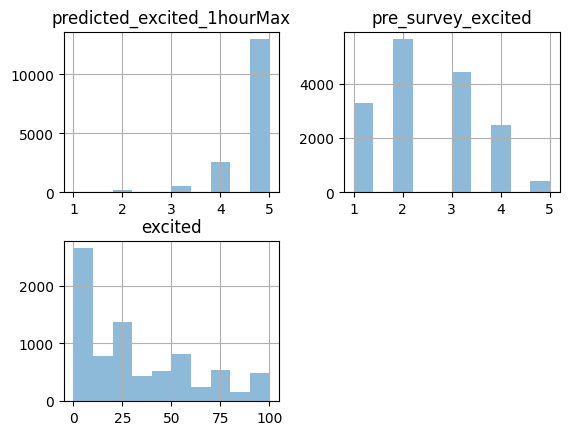

In [123]:
merged_hourMax[['predicted_excited_1hourMax', 'pre_survey_excited', 'excited']].hist(alpha=0.5)

In [182]:
angry_corr = merged_hourMax[[
# 'angry', 
# 'predicted_angry_1hourMax',
'pre_survey_enthusiastic', 
'pre_survey_happy', 
'pre_survey_still', 
'pre_survey_lonely',
'pre_survey_sad',
'pre_survey_nervous',
'pre_survey_satisfied',
'pre_survey_calm',
'pre_survey_relaxed',
'pre_survey_tired',
'pre_survey_fearful',
'pre_survey_aroused',
'pre_survey_excited',
'pre_survey_bored',
'pre_survey_angry'
]].corr()
round(angry_corr,2)

,pre_survey_enthusiastic,pre_survey_happy,pre_survey_still,pre_survey_lonely,pre_survey_sad,pre_survey_nervous,pre_survey_satisfied,pre_survey_calm,pre_survey_relaxed,pre_survey_tired,pre_survey_fearful,pre_survey_aroused,pre_survey_excited,pre_survey_bored,pre_survey_angry
pre_survey_enthusiastic,1.00,0.61,0.10,-0.02,-0.11,-0.03,0.57,0.35,0.39,-0.09,-0.01,0.28,0.70,-0.21,-0.13
pre_survey_happy,0.61,1.00,0.18,-0.13,-0.27,-0.19,0.68,0.52,0.55,-0.20,-0.21,0.17,0.58,-0.16,-0.32
pre_survey_still,0.10,0.18,1.00,0.15,-0.05,-0.08,0.19,0.40,0.36,0.08,-0.10,0.10,0.10,0.13,-0.07
pre_survey_lonely,-0.02,-0.13,0.15,1.00,0.35,0.35,-0.08,-0.09,-0.08,0.43,0.30,0.22,0.08,0.33,0.26
pre_survey_sad,-0.11,-0.27,-0.05,0.35,1.00,0.57,-0.24,-0.28,-0.32,0.43,0.56,0.08,-0.05,0.19,0.56
pre_survey_nervous,-0.03,-0.19,-0.08,0.35,0.57,1.00,-0.17,-0.32,-0.38,0.48,0.71,0.12,0.04,0.13,0.51
pre_survey_satisfied,0.57,0.68,0.19,-0.08,-0.24,-0.17,1.00,0.46,0.51,-0.22,-0.17,0.19,0.55,-0.21,-0.27
pre_survey_calm,0.35,0.52,0.40,-0.09,-0.28,-0.32,0.46,1.00,0.71,-0.16,-0.30,0.03,0.27,-0.02,-0.37
pre_survey_relaxed,0.39,0.55,0.36,-0.08,-0.32,-0.38,0.51,0.71,1.00,-0.18,-0.34,0.08,0.31,-0.06,-0.38
pre_survey_tired,-0.09,-0.20,0.08,0.43,0.43,0.48,-0.22,-0.16,-0.18,1.00,0.41,0.10,0.00,0.38,0.39


make z score

In [127]:
merged_hourMax['var_age'] = (merged_hourMax['age'] - merged_hourMax['age'].mean()) / merged_hourMax['age'].std()
merged_hourMax['var_age'].describe()

count    16291.000000
mean         0.000000
std          1.000000
min         -1.856779
25%         -0.771491
50%         -0.120318
75%          0.820265
max          2.701431
Name: var_age, dtype: float64

In [126]:
# shift ladder to have a mean 0
merged_hourMax['var_ladder'] = (merged_hourMax['ladder'] - merged_hourMax['ladder'].mean())
merged_hourMax['var_ladder'].describe()

count    1.629100e+04
mean    -3.279898e-16
std      1.764364e+00
min     -3.990301e+00
25%     -9.903014e-01
50%      9.698607e-03
75%      1.009699e+00
max      5.009699e+00
Name: var_ladder, dtype: float64

In [128]:
merged_hourMax['var_pre_survey_angry'] = (merged_hourMax['pre_survey_angry'] - merged_hourMax['pre_survey_angry'].mean()) / merged_hourMax['pre_survey_angry'].std()
merged_hourMax['var_pre_survey_sad'] = (merged_hourMax['pre_survey_sad'] - merged_hourMax['pre_survey_sad'].mean()) / merged_hourMax['pre_survey_sad'].std()
merged_hourMax['var_pre_survey_excited'] = (merged_hourMax['pre_survey_excited'] - merged_hourMax['pre_survey_excited'].mean()) / merged_hourMax['pre_survey_excited'].std()
merged_hourMax['var_pre_survey_calm'] = (merged_hourMax['pre_survey_calm'] - merged_hourMax['pre_survey_calm'].mean()) / merged_hourMax['pre_survey_calm'].std()


Actual Regression

In [130]:
emotions = ['angry', 'excited', 'sad', 'calm']
for emotion in emotions:
    print("-" * 30)
    print("Regression Result for " + emotion)
    md = smf.mixedlm(f"{emotion} ~ var_age + binary_female + var_ladder + var_pre_survey_{emotion} + var_pre_survey_excited + predicted_{emotion}_1hourMax", merged_hourMax, groups=merged_hourMax["user_id"], missing='drop')
    mdf = md.fit()
    print(mdf.summary())

------------------------------
Regression Result for angry
               Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    angry      
No. Observations:      8108       Method:                REML       
No. Groups:            1152       Scale:                 272.4179   
Min. group size:       1          Log-Likelihood:        -35190.9199
Max. group size:       42         Converged:             Yes        
Mean group size:       7.0                                          
--------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                 12.790    1.152 11.103 0.000 10.532 15.048
var_age                    0.953    0.509  1.872 0.061 -0.045  1.951
binary_female             -2.766    1.025 -2.698 0.007 -4.775 -0.757
var_ladder                -0.503    0.299 -1.681 0.093 -1.08

## 1HourExponential

In [132]:
hourExponential = pd.read_csv("aggregation_data2/1hourExponential.csv")
hourExponential.columns

Index(['question_id', 'user_id', 'time', 'tweet_id', 'tab_id',
       'user_condition', 'angry', 'calm', 'excited', 'sad',
       'predicted_nervous_1hourExponential', 'predicted_sad_1hourExponential',
       'predicted_happy_1hourExponential', 'predicted_calm_1hourExponential',
       'predicted_excited_1hourExponential',
       'predicted_aroused_1hourExponential',
       'predicted_angry_1hourExponential',
       'predicted_relaxed_1hourExponential',
       'predicted_fearful_1hourExponential',
       'predicted_enthusiastic_1hourExponential',
       'predicted_still_1hourExponential',
       'predicted_satisfied_1hourExponential',
       'predicted_bored_1hourExponential', 'predicted_lonely_1hourExponential',
       'predicted_tired'],
      dtype='object')

In [133]:
print(len(hourExponential))

16315


In [134]:
merged_hourExponential = pd.merge(hourExponential, pre_study, on=['user_id'])
print(len(merged_hourExponential))

16291


In [135]:
merged_hourExponential.columns

Index(['question_id', 'user_id', 'time', 'tweet_id', 'tab_id',
       'user_condition_x', 'angry', 'calm', 'excited', 'sad',
       'predicted_nervous_1hourExponential', 'predicted_sad_1hourExponential',
       'predicted_happy_1hourExponential', 'predicted_calm_1hourExponential',
       'predicted_excited_1hourExponential',
       'predicted_aroused_1hourExponential',
       'predicted_angry_1hourExponential',
       'predicted_relaxed_1hourExponential',
       'predicted_fearful_1hourExponential',
       'predicted_enthusiastic_1hourExponential',
       'predicted_still_1hourExponential',
       'predicted_satisfied_1hourExponential',
       'predicted_bored_1hourExponential', 'predicted_lonely_1hourExponential',
       'predicted_tired', 'user_condition_y', 'gender', 'age', 'ladder',
       'pre_survey_enthusiastic', 'pre_survey_happy', 'pre_survey_still',
       'pre_survey_lonely', 'pre_survey_sad', 'pre_survey_nervous',
       'pre_survey_satisfied', 'pre_survey_calm', 'pre_surve

#### Correlation of predicted emotion, pre_survey emotion, and inline_survey emotion

In [137]:
merged_hourExponential[['predicted_sad_1hourExponential','pre_survey_sad', 'sad']].corr()

,predicted_sad_1hourExponential,pre_survey_sad,sad
predicted_sad_1hourExponential,1.000000,-0.007978,0.047073
pre_survey_sad,-0.007978,1.000000,0.310739
sad,0.047073,0.310739,1.000000


In [138]:
merged_hourExponential[['predicted_angry_1hourExponential','pre_survey_angry', 'angry']].corr()

,predicted_angry_1hourExponential,pre_survey_angry,angry
predicted_angry_1hourExponential,1.000000,0.040209,0.159037
pre_survey_angry,0.040209,1.000000,0.314129
angry,0.159037,0.314129,1.000000


In [139]:
merged_hourExponential[['predicted_calm_1hourExponential','pre_survey_calm', 'calm']].corr()

,predicted_calm_1hourExponential,pre_survey_calm,calm
predicted_calm_1hourExponential,1.000000,0.003699,0.008567
pre_survey_calm,0.003699,1.000000,0.375801
calm,0.008567,0.375801,1.000000


In [140]:
merged_hourExponential[['predicted_excited_1hourExponential','pre_survey_excited', 'excited']].corr()

,predicted_excited_1hourExponential,pre_survey_excited,excited
predicted_excited_1hourExponential,1.000000,0.056850,0.059953
pre_survey_excited,0.056850,1.000000,0.401166
excited,0.059953,0.401166,1.000000


### Regression

In [143]:
merged_hourExponential['gender'].value_counts()

gender
male      9062
female    6901
other      328
Name: count, dtype: int64

In [142]:
merged_hourExponential['binary_female'] = 0
merged_hourExponential.binary_female[merged_hourExponential.gender == 'female'] = 1

/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipykernel_1956/1863414036.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  merged_hourExponential.binary_female[merged_hourExponential.gender == 'female'] = 1
/var/folders/76/5w1g8h3d1y53y5

In [144]:
merged_hourExponential['binary_female'].value_counts()

binary_female
0    9390
1    6901
Name: count, dtype: int64

check the correlation between some factors - so they are not colinear when we do regression.

In [145]:
merged_hourExponential[['predicted_angry_1hourExponential','pre_survey_angry', 'angry', 'age', 'binary_female']].corr()

,predicted_angry_1hourExponential,pre_survey_angry,angry,age,binary_female
predicted_angry_1hourExponential,1.000000,0.040209,0.159037,0.098901,-0.041118
pre_survey_angry,0.040209,1.000000,0.314129,-0.048423,-0.031996
angry,0.159037,0.314129,1.000000,0.031987,-0.059566
age,0.098901,-0.048423,0.031987,1.000000,0.090854
binary_female,-0.041118,-0.031996,-0.059566,0.090854,1.000000


array([[<Axes: title={'center': 'predicted_angry_1hourExponential'}>,
        <Axes: title={'center': 'pre_survey_angry'}>],
       [<Axes: title={'center': 'angry'}>, <Axes: >]], dtype=object)

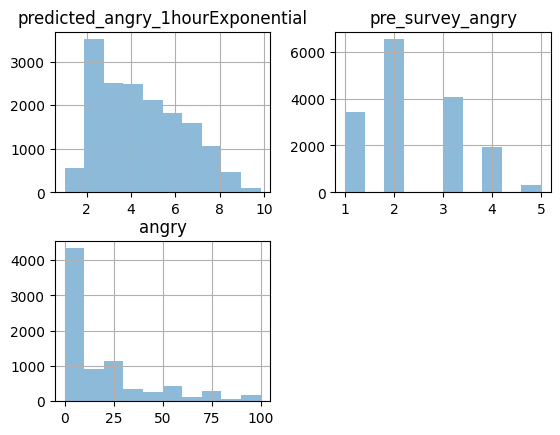

In [147]:
merged_hourExponential[['predicted_angry_1hourExponential','pre_survey_angry', 'angry']].hist(alpha=0.5)

In [149]:
angry_corr = merged_hourExponential[['angry', 
'predicted_angry_1hourExponential',
'pre_survey_enthusiastic', 
'pre_survey_happy', 
'pre_survey_still', 
'pre_survey_lonely',
'pre_survey_sad',
'pre_survey_nervous',
'pre_survey_satisfied',
'pre_survey_calm',
'pre_survey_relaxed',
'pre_survey_tired',
'pre_survey_fearful',
'pre_survey_aroused',
'pre_survey_excited',
'pre_survey_bored',
'pre_survey_angry'
]].corr()
round(angry_corr,2)

,angry,predicted_angry_1hourExponential,pre_survey_enthusiastic,pre_survey_happy,pre_survey_still,pre_survey_lonely,pre_survey_sad,pre_survey_nervous,pre_survey_satisfied,pre_survey_calm,pre_survey_relaxed,pre_survey_tired,pre_survey_fearful,pre_survey_aroused,pre_survey_excited,pre_survey_bored,pre_survey_angry
angry,1.00,0.16,-0.10,-0.19,-0.13,0.16,0.25,0.24,-0.16,-0.24,-0.24,0.18,0.28,0.04,-0.07,0.04,0.31
predicted_angry_1hourExponential,0.16,1.00,-0.02,-0.05,-0.02,-0.02,0.03,-0.00,-0.05,-0.01,-0.04,-0.00,0.04,-0.02,-0.05,-0.02,0.04
pre_survey_enthusiastic,-0.10,-0.02,1.00,0.61,0.10,-0.02,-0.11,-0.03,0.57,0.35,0.39,-0.09,-0.01,0.28,0.70,-0.21,-0.13
pre_survey_happy,-0.19,-0.05,0.61,1.00,0.18,-0.13,-0.27,-0.19,0.68,0.52,0.55,-0.20,-0.21,0.17,0.58,-0.16,-0.32
pre_survey_still,-0.13,-0.02,0.10,0.18,1.00,0.15,-0.05,-0.08,0.19,0.40,0.36,0.08,-0.10,0.10,0.10,0.13,-0.07
pre_survey_lonely,0.16,-0.02,-0.02,-0.13,0.15,1.00,0.35,0.35,-0.08,-0.09,-0.08,0.43,0.30,0.22,0.08,0.33,0.26
pre_survey_sad,0.25,0.03,-0.11,-0.27,-0.05,0.35,1.00,0.57,-0.24,-0.28,-0.32,0.43,0.56,0.08,-0.05,0.19,0.56
pre_survey_nervous,0.24,-0.00,-0.03,-0.19,-0.08,0.35,0.57,1.00,-0.17,-0.32,-0.38,0.48,0.71,0.12,0.04,0.13,0.51
pre_survey_satisfied,-0.16,-0.05,0.57,0.68,0.19,-0.08,-0.24,-0.17,1.00,0.46,0.51,-0.22,-0.17,0.19,0.55,-0.21,-0.27
pre_survey_calm,-0.24,-0.01,0.35,0.52,0.40,-0.09,-0.28,-0.32,0.46,1.00,0.71,-0.16,-0.30,0.03,0.27,-0.02,-0.37


make z score

In [150]:
merged_hourExponential['var_age'] = (merged_hourExponential['age'] - merged_hourExponential['age'].mean()) / merged_hourExponential['age'].std()
merged_hourExponential['var_age'].describe()

count    16291.000000
mean         0.000000
std          1.000000
min         -1.856779
25%         -0.771491
50%         -0.120318
75%          0.820265
max          2.701431
Name: var_age, dtype: float64

In [151]:
# shift ladder to have a mean 0
merged_hourExponential['var_ladder'] = (merged_hourExponential['ladder'] - merged_hourExponential['ladder'].mean())
merged_hourExponential['var_ladder'].describe()

count    1.629100e+04
mean    -3.279898e-16
std      1.764364e+00
min     -3.990301e+00
25%     -9.903014e-01
50%      9.698607e-03
75%      1.009699e+00
max      5.009699e+00
Name: var_ladder, dtype: float64

In [152]:
merged_hourExponential['var_pre_survey_angry'] = (merged_hourExponential['pre_survey_angry'] - merged_hourExponential['pre_survey_angry'].mean()) / merged_hourExponential['pre_survey_angry'].std()
merged_hourExponential['var_pre_survey_sad'] = (merged_hourExponential['pre_survey_sad'] - merged_hourExponential['pre_survey_sad'].mean()) / merged_hourExponential['pre_survey_sad'].std()
merged_hourExponential['var_pre_survey_excited'] = (merged_hourExponential['pre_survey_excited'] - merged_hourExponential['pre_survey_excited'].mean()) / merged_hourExponential['pre_survey_excited'].std()
merged_hourExponential['var_pre_survey_calm'] = (merged_hourExponential['pre_survey_calm'] - merged_hourExponential['pre_survey_calm'].mean()) / merged_hourExponential['pre_survey_calm'].std()


Actual Regression

In [156]:
import statsmodels.formula.api as smf

emotions = ['angry', 'excited', 'sad', 'calm']

# Open a text file to save the results
with open("1hourExponential_regression_results.txt", "w") as file:
    for emotion in emotions:
        file.write("-" * 30 + "\n")
        file.write("Regression Result for " + emotion + "\n")
        
        # Run the mixed linear model
        md = smf.mixedlm(
            f"{emotion} ~ var_age + binary_female + var_ladder + var_pre_survey_{emotion} + var_pre_survey_excited + predicted_{emotion}_1hourExponential",
            merged_hourExponential,
            groups=merged_hourExponential["user_id"],
            missing='drop'
        )
        mdf = md.fit()
        
        # Write the summary to the file
        file.write(mdf.summary().as_text() + "\n")


In [153]:
emotions = ['angry', 'excited', 'sad', 'calm']
for emotion in emotions:
    print("-" * 30)
    print("Regression Result for " + emotion)
    md = smf.mixedlm(f"{emotion} ~ var_age + binary_female + var_ladder + var_pre_survey_{emotion} + var_pre_survey_excited + predicted_{emotion}_1hourExponential", merged_hourExponential, groups=merged_hourExponential["user_id"], missing='drop')
    mdf = md.fit()
    print(mdf.summary())

------------------------------
Regression Result for angry
                   Mixed Linear Model Regression Results
Model:                   MixedLM       Dependent Variable:       angry      
No. Observations:        8108          Method:                   REML       
No. Groups:              1152          Scale:                    271.6652   
Min. group size:         1             Log-Likelihood:           -35175.4653
Max. group size:         42            Converged:                Yes        
Mean group size:         7.0                                                
----------------------------------------------------------------------------
                                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------
Intercept                         15.300    0.853 17.938 0.000 13.628 16.971
var_age                            0.890    0.506  1.757 0.079 -0.103  1.882
binary_female                     -2.

## 1TweetBefore

In [157]:
oneTweet = pd.read_csv("aggregation_data2/1tweetBefore.csv")
oneTweet.columns

Index(['question_id', 'user_id', 'time', 'tweet_id', 'tab_id',
       'user_condition', 'angry', 'calm', 'excited', 'sad',
       'predicted_nervous', 'predicted_sad', 'predicted_happy',
       'predicted_calm', 'predicted_excited', 'predicted_aroused',
       'predicted_angry', 'predicted_relaxed', 'predicted_fearful',
       'predicted_enthusiastic', 'predicted_still', 'predicted_satisfied',
       'predicted_bored', 'predicted_lonely', 'predicted_tired'],
      dtype='object')

In [159]:
oneTweet.rename(columns={col: f"{col}_1tweetBefore" for col in oneTweet.columns if col.startswith('predicted_')}, inplace=True)

# Check the updated columns
print(oneTweet.columns)

Index(['question_id', 'user_id', 'time', 'tweet_id', 'tab_id',
       'user_condition', 'angry', 'calm', 'excited', 'sad',
       'predicted_nervous_1tweetBefore', 'predicted_sad_1tweetBefore',
       'predicted_happy_1tweetBefore', 'predicted_calm_1tweetBefore',
       'predicted_excited_1tweetBefore', 'predicted_aroused_1tweetBefore',
       'predicted_angry_1tweetBefore', 'predicted_relaxed_1tweetBefore',
       'predicted_fearful_1tweetBefore', 'predicted_enthusiastic_1tweetBefore',
       'predicted_still_1tweetBefore', 'predicted_satisfied_1tweetBefore',
       'predicted_bored_1tweetBefore', 'predicted_lonely_1tweetBefore',
       'predicted_tired_1tweetBefore'],
      dtype='object')


In [160]:
oneTweet.to_csv("aggregation_data2/1tweetBefore.csv",index=False)

In [161]:
oneTweet.columns

Index(['question_id', 'user_id', 'time', 'tweet_id', 'tab_id',
       'user_condition', 'angry', 'calm', 'excited', 'sad',
       'predicted_nervous_1tweetBefore', 'predicted_sad_1tweetBefore',
       'predicted_happy_1tweetBefore', 'predicted_calm_1tweetBefore',
       'predicted_excited_1tweetBefore', 'predicted_aroused_1tweetBefore',
       'predicted_angry_1tweetBefore', 'predicted_relaxed_1tweetBefore',
       'predicted_fearful_1tweetBefore', 'predicted_enthusiastic_1tweetBefore',
       'predicted_still_1tweetBefore', 'predicted_satisfied_1tweetBefore',
       'predicted_bored_1tweetBefore', 'predicted_lonely_1tweetBefore',
       'predicted_tired_1tweetBefore'],
      dtype='object')

In [162]:
print(len(oneTweet))

14872


In [163]:
print(oneTweet.head())

                        question_id                           user_id  \
0  5f3b6ebd9a7040a38513726b70657033  009FBF921182482EB3B2C7C66D5DF395   
1  c438a99d6afd419dbdf3e0721fb99eb3  009FBF921182482EB3B2C7C66D5DF395   
2  afe3b1e4a9bf4050b14ced074dbe9b75  009FBF921182482EB3B2C7C66D5DF395   
3  bdecbe16b4464dc9930fa6dfb41c6927  009FBF921182482EB3B2C7C66D5DF395   
4  deb7b6a4018a4c43a182bc641ec00e83  009FBF921182482EB3B2C7C66D5DF395   

                      time             tweet_id  \
0  2024-07-08 21:08:13.164  1810281303217967397   
1  2024-07-08 21:10:40.822  1810419787660513353   
2  2024-07-08 21:20:07.275  1810039913515008329   
3  2024-07-08 21:30:53.346  1810296420056121348   
4  2024-07-08 23:01:13.242  1810482606376386645   

                                 tab_id user_condition  angry  calm  excited  \
0  c5bb5f23-7e2b-4582-aee1-19e5a4a0b0ca            R_T    NaN   NaN      0.0   
1  c5bb5f23-7e2b-4582-aee1-19e5a4a0b0ca            R_T    NaN   NaN      0.0   
2  c5bb5f23-7e

In [164]:
merged_oneTweet = pd.merge(oneTweet, pre_study, on=['user_id'])
print(len(merged_oneTweet))

14851


In [165]:
merged_oneTweet.columns

Index(['question_id', 'user_id', 'time', 'tweet_id', 'tab_id',
       'user_condition_x', 'angry', 'calm', 'excited', 'sad',
       'predicted_nervous_1tweetBefore', 'predicted_sad_1tweetBefore',
       'predicted_happy_1tweetBefore', 'predicted_calm_1tweetBefore',
       'predicted_excited_1tweetBefore', 'predicted_aroused_1tweetBefore',
       'predicted_angry_1tweetBefore', 'predicted_relaxed_1tweetBefore',
       'predicted_fearful_1tweetBefore', 'predicted_enthusiastic_1tweetBefore',
       'predicted_still_1tweetBefore', 'predicted_satisfied_1tweetBefore',
       'predicted_bored_1tweetBefore', 'predicted_lonely_1tweetBefore',
       'predicted_tired_1tweetBefore', 'user_condition_y', 'gender', 'age',
       'ladder', 'pre_survey_enthusiastic', 'pre_survey_happy',
       'pre_survey_still', 'pre_survey_lonely', 'pre_survey_sad',
       'pre_survey_nervous', 'pre_survey_satisfied', 'pre_survey_calm',
       'pre_survey_relaxed', 'pre_survey_tired', 'pre_survey_fearful',
       'pr

#### Correlation of predicted emotion, pre_survey emotion, and inline_survey emotion

In [166]:
merged_oneTweet[['predicted_sad_1tweetBefore','pre_survey_sad', 'sad']].corr()

,predicted_sad_1tweetBefore,pre_survey_sad,sad
predicted_sad_1tweetBefore,1.000000,-0.011640,0.039583
pre_survey_sad,-0.011640,1.000000,0.313866
sad,0.039583,0.313866,1.000000


In [167]:
merged_oneTweet[['predicted_angry_1tweetBefore','pre_survey_angry', 'angry']].corr()

,predicted_angry_1tweetBefore,pre_survey_angry,angry
predicted_angry_1tweetBefore,1.000000,0.006029,0.117556
pre_survey_angry,0.006029,1.000000,0.317615
angry,0.117556,0.317615,1.000000


In [168]:
merged_oneTweet[['predicted_calm_1tweetBefore','pre_survey_calm', 'calm']].corr()

,predicted_calm_1tweetBefore,pre_survey_calm,calm
predicted_calm_1tweetBefore,1.000000,0.007197,0.036840
pre_survey_calm,0.007197,1.000000,0.368265
calm,0.036840,0.368265,1.000000


In [169]:
merged_oneTweet[['predicted_excited_1tweetBefore','pre_survey_excited', 'excited']].corr()

,predicted_excited_1tweetBefore,pre_survey_excited,excited
predicted_excited_1tweetBefore,1.000000,0.034039,0.06024
pre_survey_excited,0.034039,1.000000,0.40512
excited,0.060240,0.405120,1.00000


### Regression

<Axes: >

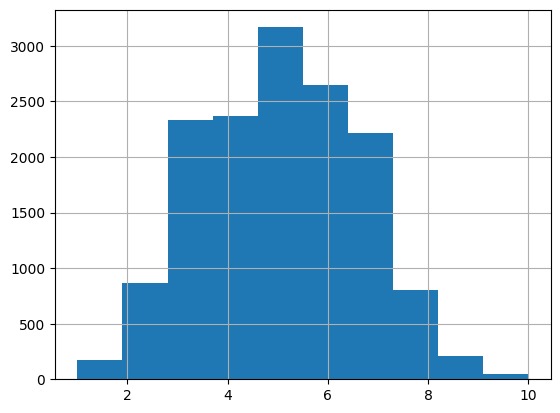

In [170]:
merged_oneTweet['ladder'].hist()

In [171]:
merged_oneTweet['gender'].value_counts()

gender
male      8273
female    6321
other      257
Name: count, dtype: int64

In [172]:
merged_oneTweet['binary_female'] = 0
merged_oneTweet.binary_female[merged_oneTweet.gender == 'female'] = 1

/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000gn/T/ipykernel_1956/2252356066.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  merged_oneTweet.binary_female[merged_oneTweet.gender == 'female'] = 1
/var/folders/76/5w1g8h3d1y53y5vcpx55tgl00000

In [173]:
merged_oneTweet['binary_female'].value_counts()

binary_female
0    8530
1    6321
Name: count, dtype: int64

check the correlation between some factors - so they are not colinear when we do regression.

In [174]:
merged_oneTweet[['predicted_angry_1tweetBefore','pre_survey_angry', 'angry', 'age', 'binary_female']].corr()

,predicted_angry_1tweetBefore,pre_survey_angry,angry,age,binary_female
predicted_angry_1tweetBefore,1.000000,0.006029,0.117556,0.034778,-0.020127
pre_survey_angry,0.006029,1.000000,0.317615,-0.045879,-0.028653
angry,0.117556,0.317615,1.000000,0.024412,-0.062041
age,0.034778,-0.045879,0.024412,1.000000,0.084091
binary_female,-0.020127,-0.028653,-0.062041,0.084091,1.000000


array([[<Axes: title={'center': 'predicted_angry_1tweetBefore'}>,
        <Axes: title={'center': 'pre_survey_angry'}>],
       [<Axes: title={'center': 'angry'}>, <Axes: >]], dtype=object)

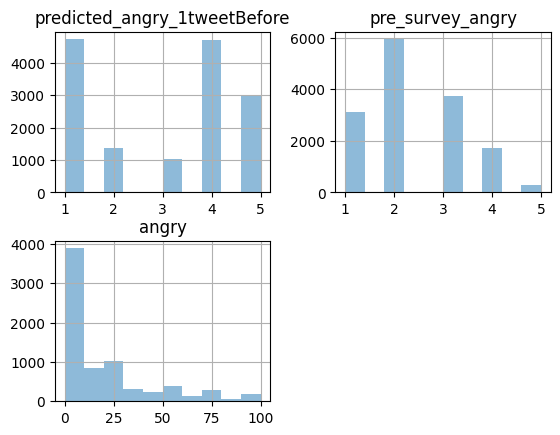

In [175]:
merged_oneTweet[['predicted_angry_1tweetBefore','pre_survey_angry', 'angry']].hist(alpha=0.5)

array([[<Axes: title={'center': 'predicted_excited_1tweetBefore'}>,
        <Axes: title={'center': 'pre_survey_excited'}>],
       [<Axes: title={'center': 'excited'}>, <Axes: >]], dtype=object)

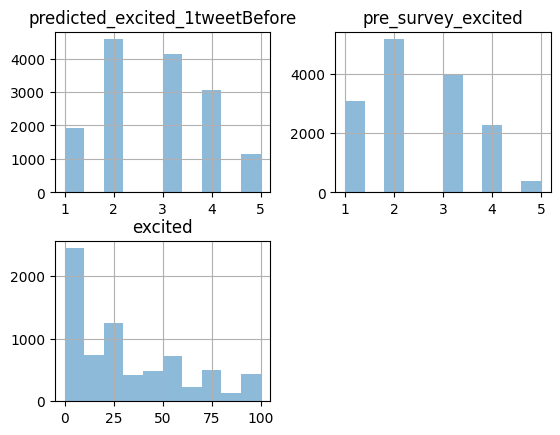

In [176]:
merged_oneTweet[['predicted_excited_1tweetBefore', 'pre_survey_excited', 'excited']].hist(alpha=0.5)

In [177]:
angry_corr = merged_oneTweet[['angry', 
'predicted_angry_1tweetBefore',
'pre_survey_enthusiastic', 
'pre_survey_happy', 
'pre_survey_still', 
'pre_survey_lonely',
'pre_survey_sad',
'pre_survey_nervous',
'pre_survey_satisfied',
'pre_survey_calm',
'pre_survey_relaxed',
'pre_survey_tired',
'pre_survey_fearful',
'pre_survey_aroused',
'pre_survey_excited',
'pre_survey_bored',
'pre_survey_angry'
]].corr()
round(angry_corr,2)

,angry,predicted_angry_1tweetBefore,pre_survey_enthusiastic,pre_survey_happy,pre_survey_still,pre_survey_lonely,pre_survey_sad,pre_survey_nervous,pre_survey_satisfied,pre_survey_calm,pre_survey_relaxed,pre_survey_tired,pre_survey_fearful,pre_survey_aroused,pre_survey_excited,pre_survey_bored,pre_survey_angry
angry,1.00,0.12,-0.10,-0.19,-0.13,0.15,0.25,0.23,-0.17,-0.24,-0.25,0.18,0.27,0.04,-0.07,0.05,0.32
predicted_angry_1tweetBefore,0.12,1.00,-0.02,-0.04,0.01,-0.03,0.02,-0.00,-0.03,-0.01,-0.03,0.00,0.03,-0.00,-0.03,-0.00,0.01
pre_survey_enthusiastic,-0.10,-0.02,1.00,0.60,0.11,-0.02,-0.11,-0.01,0.57,0.34,0.38,-0.08,-0.00,0.27,0.70,-0.20,-0.12
pre_survey_happy,-0.19,-0.04,0.60,1.00,0.19,-0.12,-0.26,-0.18,0.67,0.53,0.55,-0.19,-0.20,0.16,0.58,-0.15,-0.31
pre_survey_still,-0.13,0.01,0.11,0.19,1.00,0.13,-0.06,-0.08,0.19,0.39,0.36,0.07,-0.10,0.10,0.09,0.12,-0.07
pre_survey_lonely,0.15,-0.03,-0.02,-0.12,0.13,1.00,0.34,0.35,-0.07,-0.09,-0.07,0.44,0.30,0.22,0.08,0.33,0.25
pre_survey_sad,0.25,0.02,-0.11,-0.26,-0.06,0.34,1.00,0.57,-0.23,-0.28,-0.31,0.42,0.55,0.08,-0.04,0.18,0.56
pre_survey_nervous,0.23,-0.00,-0.01,-0.18,-0.08,0.35,0.57,1.00,-0.16,-0.32,-0.37,0.47,0.70,0.12,0.05,0.12,0.51
pre_survey_satisfied,-0.17,-0.03,0.57,0.67,0.19,-0.07,-0.23,-0.16,1.00,0.46,0.50,-0.20,-0.16,0.19,0.55,-0.21,-0.26
pre_survey_calm,-0.24,-0.01,0.34,0.53,0.39,-0.09,-0.28,-0.32,0.46,1.00,0.71,-0.16,-0.30,0.03,0.27,-0.02,-0.37


Make z score

In [178]:
merged_oneTweet['var_age'] = (merged_oneTweet['age'] - merged_oneTweet['age'].mean()) / merged_oneTweet['age'].std()
merged_oneTweet['var_age'].describe()

count    1.485100e+04
mean     1.071723e-16
std      1.000000e+00
min     -1.876511e+00
25%     -7.950149e-01
50%     -1.461172e-01
75%      7.911796e-01
max      2.665773e+00
Name: var_age, dtype: float64

In [179]:
# shift ladder to have a mean 0
merged_oneTweet['var_ladder'] = (merged_oneTweet['ladder'] - merged_oneTweet['ladder'].mean())
merged_oneTweet['var_ladder'].describe()

count    1.485100e+04
mean    -3.942409e-16
std      1.755656e+00
min     -4.017305e+00
25%     -1.017305e+00
50%     -1.730523e-02
75%      9.826948e-01
max      4.982695e+00
Name: var_ladder, dtype: float64

In [180]:
merged_oneTweet['var_pre_survey_angry'] = (merged_oneTweet['pre_survey_angry'] - merged_oneTweet['pre_survey_angry'].mean()) / merged_oneTweet['pre_survey_angry'].std()
merged_oneTweet['var_pre_survey_sad'] = (merged_oneTweet['pre_survey_sad'] - merged_oneTweet['pre_survey_sad'].mean()) / merged_oneTweet['pre_survey_sad'].std()
merged_oneTweet['var_pre_survey_excited'] = (merged_oneTweet['pre_survey_excited'] - merged_oneTweet['pre_survey_excited'].mean()) / merged_oneTweet['pre_survey_excited'].std()
merged_oneTweet['var_pre_survey_calm'] = (merged_oneTweet['pre_survey_calm'] - merged_oneTweet['pre_survey_calm'].mean()) / merged_oneTweet['pre_survey_calm'].std()


Actual Regression

In [181]:
emotions = ['angry', 'excited', 'sad', 'calm']
for emotion in emotions:
    print("-" * 30)
    print("Regression Result for " + emotion)
    md = smf.mixedlm(f"{emotion} ~ var_age + binary_female + var_ladder + var_pre_survey_{emotion} + var_pre_survey_excited + predicted_{emotion}_1tweetBefore", merged_oneTweet, groups=merged_oneTweet["user_id"], missing='drop')
    mdf = md.fit()
    print(mdf.summary())

------------------------------
Regression Result for angry
                 Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      angry      
No. Observations:      7372         Method:                  REML       
No. Groups:            1126         Scale:                   272.4281   
Min. group size:       1            Log-Likelihood:          -32044.2582
Max. group size:       39           Converged:               Yes        
Mean group size:       6.5                                              
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                     16.761    0.840 19.961 0.000 15.115 18.407
var_age                        0.770    0.525  1.468 0.142 -0.258  1.798
binary_female                 -2.726    1.054 -2.587 0.010 -4.791 -0.661
var_ladder